# Seaborn vs Matplotlib

## Overview:
- Matplotlib is lower level- it gives you a lot of tools to do anything you need
- Seaborn excels at making statistical plots that look great and are easy to use

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Scatter plots

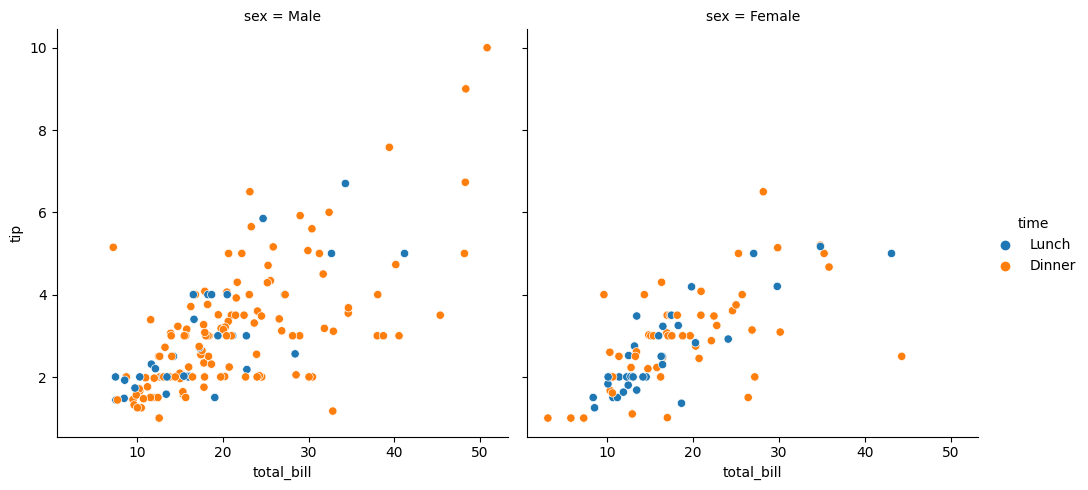

In [8]:
# Seaborn

sns.relplot(x='total_bill', y='tip', data=df, hue='time', col='sex')

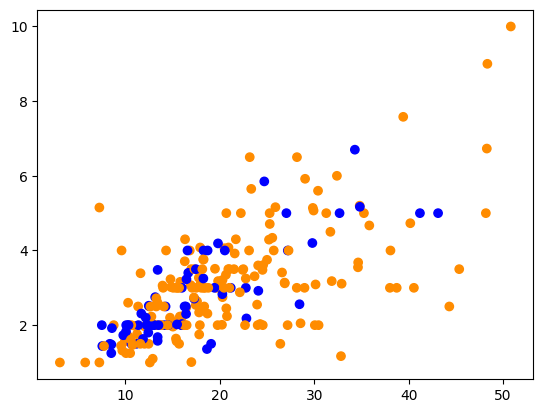

In [7]:
# Matplotlib

color = {'Lunch': 'blue', 'Dinner': 'darkorange'}
plt.scatter(x='total_bill', y='tip', data=df, c=df['time'].map(color))

## Linear Regression

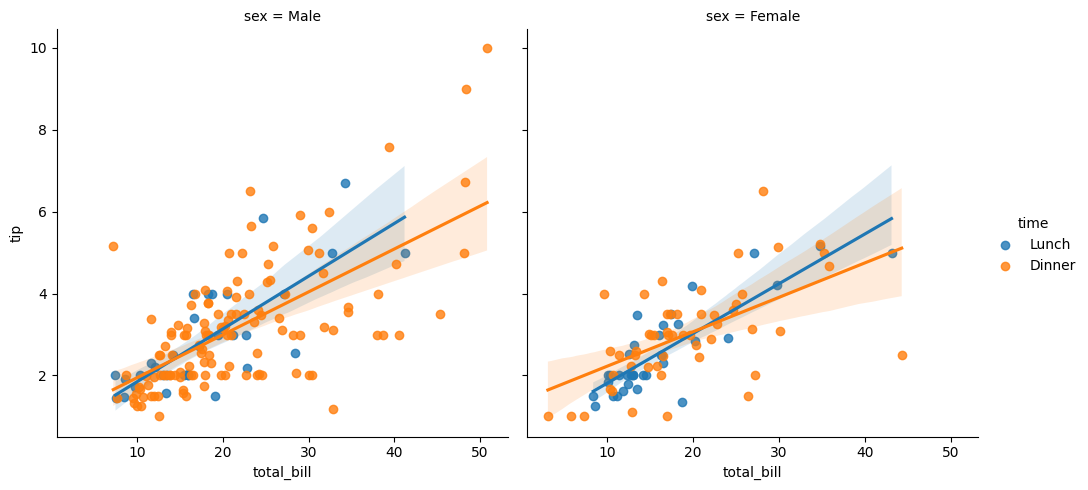

In [10]:
sns.lmplot(x="total_bill", y="tip", data=df, hue='time', col='sex')

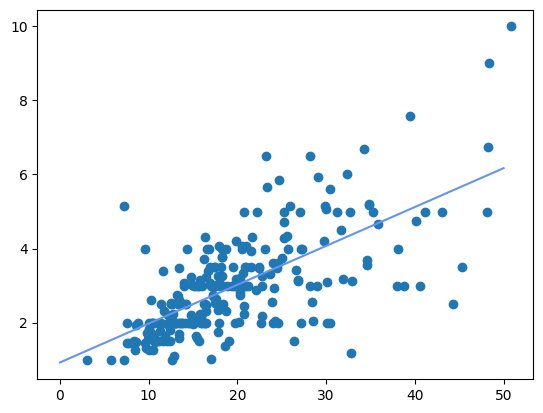

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = df['total_bill'].to_numpy()
y = df['tip'].to_numpy()

model = LinearRegression()
model.fit(x.reshape(-1,1), y)

x_new = np.linspace(0, 50, 100)
y_new = model.predict(x_new[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_new, y_new, color="cornflowerblue")

plt.show()

## Analyzing your data- go with Seaborn

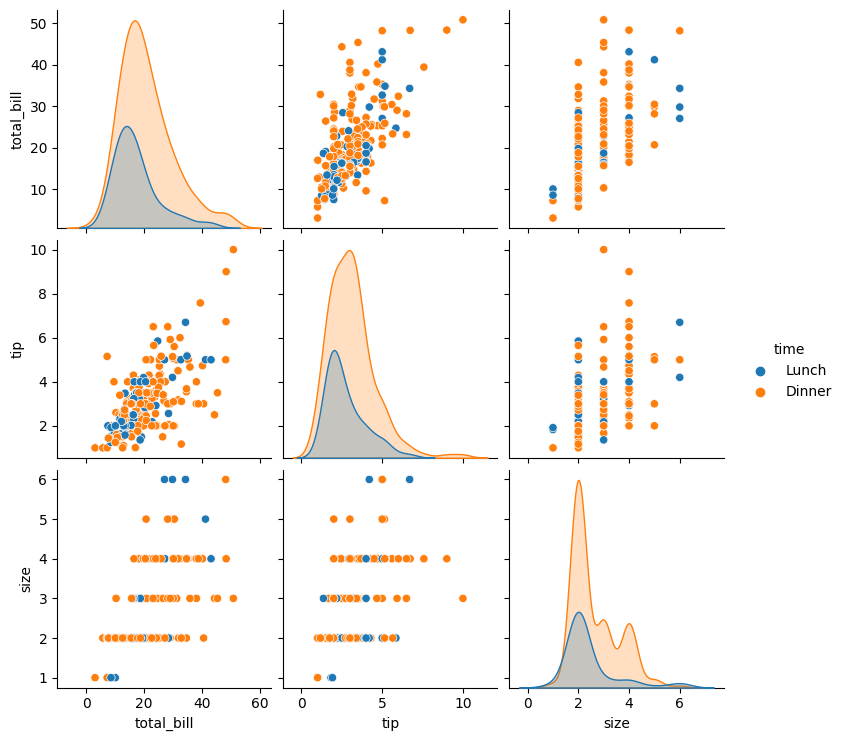

In [12]:
sns.pairplot(df, hue="time")

## More complexity- go with Matplotlib

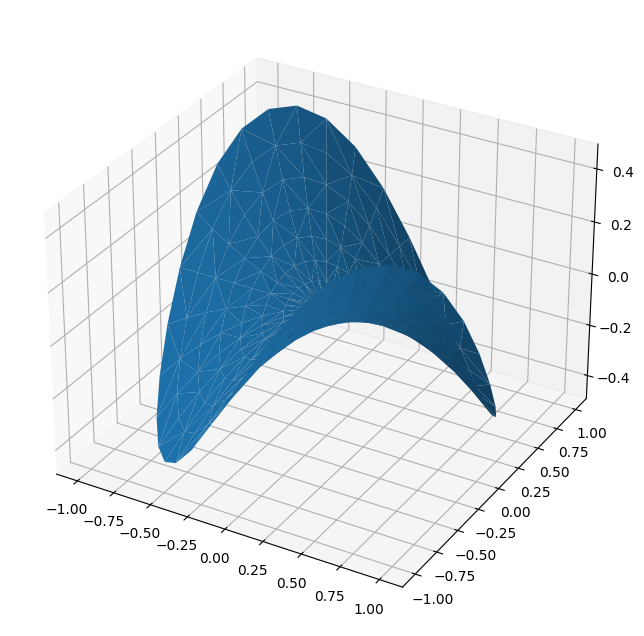

In [13]:
import numpy as np

n_radii = 8
n_angles = 36
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
z = np.sin(-x*y)
ax = plt.figure(figsize=(14,8)).add_subplot(projection='3d')
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

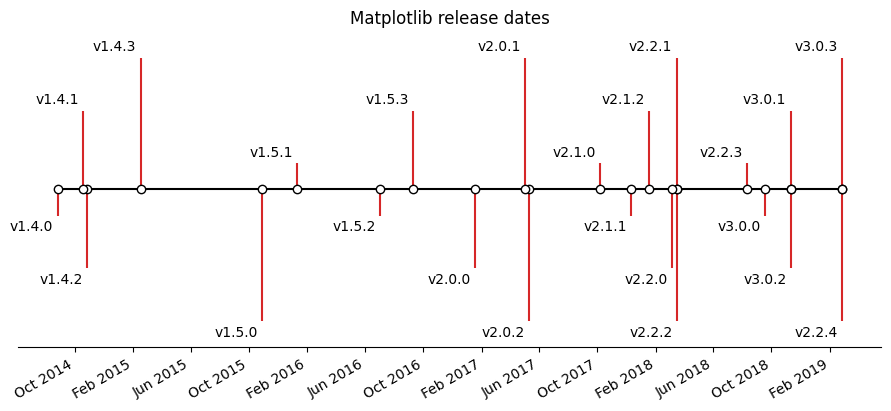

In [14]:
import matplotlib.dates as mdates
from datetime import datetime


names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
         'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
         'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
         'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
         '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
         '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
         '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
         '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
         '2014-10-26', '2014-10-18', '2014-08-26']

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()